<a href="https://colab.research.google.com/github/Shawnpeter578/practise_ML/blob/main/KMeansClusteringAlgortm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income ($)')

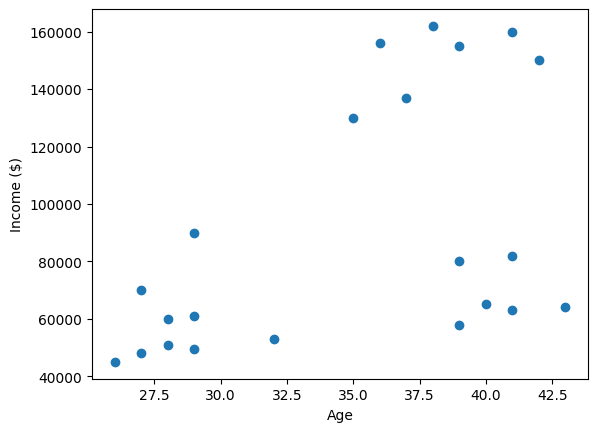

In [4]:
plt.scatter(df.Age, df["Income($)"])
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [6]:
km = KMeans(n_clusters=3)

In [7]:
km

KMeans(n_clusters=3)

In [12]:
y_pred = km.fit(df[['Age','Income($)']])

In [13]:
y_pred


KMeans(n_clusters=3)

In [14]:
y_pred.labels_

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [15]:
df['cluter'] = y_pred.labels_
df.head()

,Name,Age,Income($),cluter
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


/tmp/ipython-input-2693911563.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


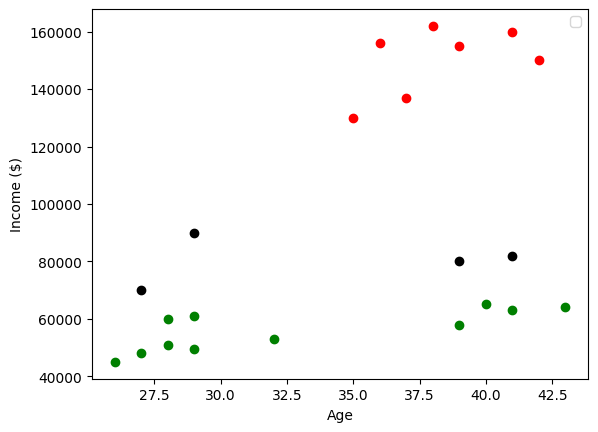

In [17]:
df1 = df[df.cluter == 0]
df2 = df[df.cluter == 1]
df3 = df[df.cluter == 2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [20]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df['Age'] = scaler.transform(df[["Age"]])

In [21]:
df

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [22]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])

In [23]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [24]:
df['cluster'] = y_pred
df.head()
df.drop('cluter', axis=1)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


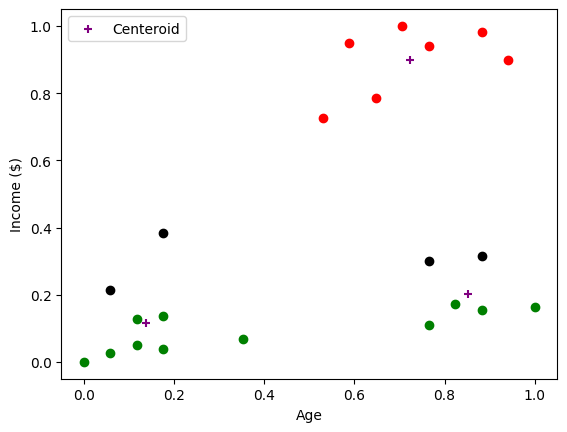

In [27]:
km.cluster_centers_
df1 = df[df.cluter == 0]
df2 = df[df.cluter == 1]
df3 = df[df.cluter == 2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker="+", label="Centeroid")

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [28]:
k_rng = range(1,10)

In [29]:
sse = [ ]

In [31]:
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

In [32]:
sse

[5.434011511988176,
 2.345614491472593,
 0.4750783498553095,
 0.36877340764405897,
 0.28184797443662374,
 0.23844880713540692,
 0.21005328725621214,
 0.14391444958090926,
 0.10938598377046613]

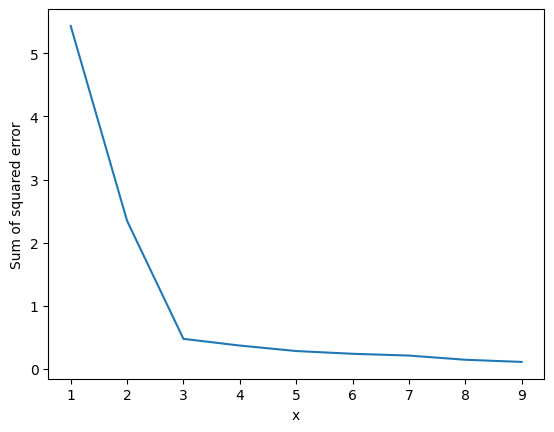

In [33]:
plt.xlabel('x')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)